# 波士顿房价预测
## 1. 数据集介绍
波士顿住房数据集(bostonhousing.csv)包含美国人口普查局收集的美国马萨诸塞州波士顿住房价格的有关信息，数据字段及具体含义如下：
- CRIM: per capita crime rate by town. 城镇人均犯罪率
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 占地面积超过25,000平方英尺的住宅用地比例
- INDUS: proportion of non-retail business acres per town. 每个城镇非零售业务的比例
- CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise). 是否沿河道，是为1，否为0
- NOX: nitric oxides concentration (parts per 10 million). 一氧化氮浓度（每千万份）
- RM: average number of rooms per dwelling. 每间住宅的平均房间数
- AGE: proportion of owner-occupied units built prior to 1940. 1940年以前建造的自住单位比例
- DIS: weighted distances to five Boston employment centres. 波士顿的五个就业中心加权距离
- RAD: index of accessibility to radial highways. 径向高速公路的可达性指数
- TAX: full-value property-tax rate per \$10,000. 每10,000美元的全额物业税率
- PTRATIO: pupil-teacher ratio by town. 城镇的学生与教师比例
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town. 其中Bk是城镇黑人的比例
- LSTAT: lower status of the population. 人口状况下降％
- MEDV: Median value of owner-occupied homes in \$1000's. 自有住房的中位数报价, 单位1000美元

其中，MEDV为预测变量Y，其他变量为X。

In [111]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

data = pd.read_csv('./bostonhousing.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## 2. 数据探索性分析
### 2.1 查看数据总体情况

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### 2.2 查看数据分布

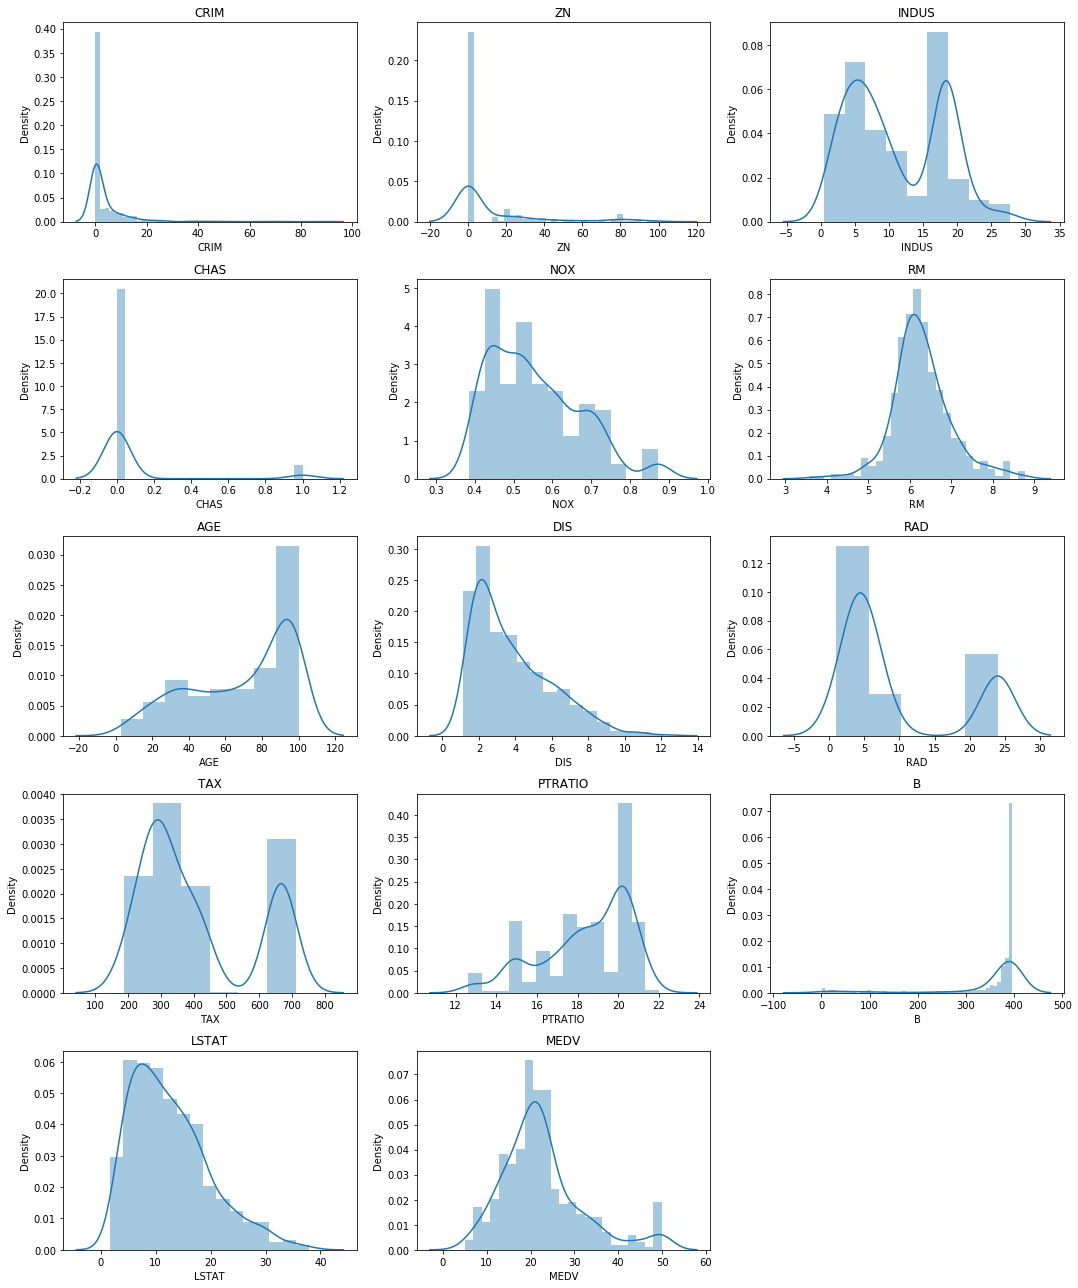

In [113]:
graph_by_variables = data.columns
plt.figure(figsize = (15, 18))
for i in range(0, 14):
    plt.subplot(5, 3, i+1)
    sns.distplot(data[graph_by_variables[i]])
    plt.title(graph_by_variables[i])
plt.tight_layout()

## 3. 数据准备

### 3.1查看缺失值情况

In [106]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### 3.2 数据标准化

In [107]:
from sklearn.preprocessing import StandardScaler
#对除CHAS以外的特征进行正态标准化
data_s = data.drop(['CHAS'],axis=1)
standard_cols = data_s.columns
z_scaler = StandardScaler().fit(data_s)
data[standard_cols] = z_scaler.transform(data_s)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,0,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,0,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,0,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,0,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,0,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


### 3.3 划分训练集和测试集
在训练模型前，我们需要将数据划分为训练集和测试集，可以采用sklearn.model_selection实现的方法[`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)。

主要用到三个参数:	
> - `data`：需要拆分的数据集。
> - `test_size`(int/float)：默认为0.2，传入为`float`表示测试集占原始数据的比例，传入为`int`时为测试集大小。
> - `random_state`：默认为None，随机数种子。
> - `shuffle`(bool)：默认是True，是否在划分数据之前先打乱数据。
> - `stratify`：默认是None，如果不是None，将会利用该标签将数据分层划分，可以用于处理不均衡的数据集。


该函数将最终同时返回训练集与测试集。

In [108]:
from sklearn.model_selection import train_test_split
#首先将数据分为预测特征（X）以及标签(y)两部分
data_X = data.drop(['MEDV'],axis=1)
data_y = data['MEDV']
#划分训练集以及测试集
X_train,X_test,y_train,y_test = train_test_split(data_X,data_y,test_size=0.2, random_state=42)
print("训练集数量：",len(X_train),",测试集数量：",len(X_test))

训练集数量： 404 ,测试集数量： 102


## 4. 波士顿房价预测

### 4.1 多元线性回归
多元线性回归的方法对应sklearn.linear_model已经实现的类[LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)。

主要用到的参数有:	
> - `fit_intercept`(bool)：默认True，是否计算模型的截距。
> - `normalize`(bool)：默认False，是否对数据进行标准正态化。
> - `copy_X`(bool)：默认True，设置为False时数据会被改写。
> - `positive`(bool)：默认为False,设置为True时，线性回归的系数将被强制为正数。

常用属性有：
> - `intercept_`：模型的截距。
> - `coef_`：模型的系数。


In [109]:
from sklearn.linear_model import LinearRegression
#模型实例化，选择默认参数
LR = LinearRegression()
#训练模型
LR.fit(X_train,y_train)
#查看模型截距
print("多元线性回归的截距为：" ,LR.intercept_)
#查看模型系数
print("多元线性回归的系数为：",LR.coef_)
#对测试集数据进行预测
y_pred = LR.predict(X_test)

多元线性回归的截距为： -0.026135966861837015
多元线性回归的系数为： [-0.10573498  0.07635554  0.030121    0.30305123 -0.21674227  0.33910693
 -0.01927079 -0.33149399  0.24845253 -0.19510257 -0.21549315  0.12260527
 -0.39487863]


#### 评价预测效果
为了评价预测模型的效果，我们将采用MAE（平均绝对误差）、RMSE（均方根误差）以及
R-Square（确定系数）三个指标，三个指标的计算方法都已经实现于[`sklearn.metrics`](https://scikit-learn.org/stable/modules/model_evaluation.html)模块中。

使用相关函数时，主要用到的参数有：
> - `y_true`：真实值。
> - `y_pred`：预测值。


In [115]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#计算MAE
MAE = mean_absolute_error(y_true=y_test, y_pred=y_pred)
print("多元线性回归MAE:",MAE)
#计算RMSE
#注意：sklearn.metrics中只实现了计算MSE的方法，为了得到RMSE，需要进行开方操作
RMSE = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))
print("多元线性回归RMSE:", RMSE)
#计算R-Square
R_Square = r2_score(y_true=y_test, y_pred=y_pred)
print("多元线性回归R_Square:", R_Square)

多元线性回归MAE: 0.3470927251421174
多元线性回归RMSE: 0.5364166292540398
多元线性回归R_Square: 0.6687594935356324


### 4.2 Lasso回归
Lasso回归是在线性回归的基础上增加L1正则项。Lasso回归的方法对应sklearn.linear_model已经实现的类[Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)。

主要用到的参数有:
> - `alpha`(float)：默认为1.0，正则化系数，当设置为0时，该模型等同于多元线性回归。
> - `fit_intercept`(bool)：默认True，是否计算模型的截距。
> - `normalize`(bool)：默认False，是否对数据进行标准正态化。
> - `copy_X`(bool)：默认True，设置为False时数据会被改写。
> - `positive`(boo)：默认为False,设置为True时，线性回归的系数将被强制为正数。

常用属性有：
> - `intercept_`：模型的截距。
> - `coef_`：模型的系数。

可选参数：<br/><br/>
class sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')<br/>
<br/>
其他参数含义可参见<https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html>

In [116]:
from sklearn.linear_model import Lasso
#模型实例化
lasso = Lasso(alpha=0.01)
#训练模型
lasso.fit(X_train,y_train)
#查看模型截距
print("Lasso回归的截距为：" ,lasso.intercept_)
#查看模型系数
print("Lasso回归的系数为：",lasso.coef_)
#对测试集数据进行预测
y_pred = lasso.predict(X_test)

Lasso回归的截距为： -0.01843761742516048
Lasso回归的系数为： [-0.08106753  0.03292597 -0.          0.1749782  -0.16571287  0.35291802
 -0.         -0.25603747  0.0927968  -0.05404755 -0.2043092   0.11484948
 -0.39877891]


In [117]:
#计算评价指标
MAE = mean_absolute_error(y_test, y_pred)
print("Lasso回归MAE:",MAE)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Lasso回归RMSE:", RMSE)
R_Square = r2_score(y_test, y_pred)
print("Lasso回归R_Square:", R_Square)

Lasso回归MAE: 0.3525000949197791
Lasso回归RMSE: 0.5497016058051273
Lasso回归R_Square: 0.6521492166567662


### 4.3 岭回归
岭回归是在线性回归的基础上增加L2正则项。岭回归的方法对应sklearn.linear_model已经实现的类[Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)。

主要用到的参数:
> - `alpha`(float)：默认为1.0，正则化系数，当设置为0时，该模型等同于多元线性回归。
> - `fit_intercept`(bool)：默认True，是否计算模型的截距。
> - `normalize`(bool)：默认False，是否对数据进行标准正态化。
> - `copy_X`(bool)：默认True，设置为False时数据会被改写。
> - `positive`(boo)：默认为False,设置为True时，线性回归的系数将被强制为正数。

常用属性：
> - `intercept_`：模型的截距。
> - `coef_`：模型的系数。

可选参数：<br/><br/>
class sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False, random_state=None)<br/>
<br/>
其他参数含义可参见<https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html>

In [118]:
from sklearn.linear_model import Ridge
#模型实例化
ridge = Ridge(alpha=0.5)
#训练模型
ridge.fit(X_train,y_train)
#查看模型截距
print("岭回归的截距为：" ,ridge.intercept_)
#查看模型系数
print("岭回归的系数为：",ridge.coef_)
#对测试集数据进行预测
y_pred = ridge.predict(X_test)

岭回归的截距为： -0.02582680792649067
岭回归的系数为： [-0.10531981  0.07539157  0.02895689  0.29820915 -0.2148675   0.3395612
 -0.01928151 -0.32960022  0.24437468 -0.19138033 -0.21512063  0.12258333
 -0.39438116]


In [119]:
#计算评价指标
MAE = mean_absolute_error(y_test, y_pred)
print("岭回归MAE:",MAE)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("岭回归RMSE:", RMSE)
R_Square = r2_score(y_test,y_pred)
print("岭回归R_Square:", R_Square)

岭回归MAE: 0.3469214570141381
岭回归RMSE: 0.5365228875203303
岭回归R_Square: 0.6686282502963408


In [150]:
#对比三种回归的系数
coef = pd.DataFrame({'LR_coef':LR.coef_,'Lasso_coef':lasso.coef_,"Ridge_coef":ridge.coef_},index=X_train.columns)
coef

,LR_coef,Lasso_coef,Ridge_coef
CRIM,-0.105735,-0.081068,-0.105320
ZN,0.076356,0.032926,0.075392
INDUS,0.030121,-0.000000,0.028957
CHAS,0.303051,0.174978,0.298209
NOX,-0.216742,-0.165713,-0.214868
RM,0.339107,0.352918,0.339561
AGE,-0.019271,-0.000000,-0.019282
DIS,-0.331494,-0.256037,-0.329600
RAD,0.248453,0.092797,0.244375
TAX,-0.195103,-0.054048,-0.191380


### 4.4 回归树
回归树的方法对应sklearn.tree已经实现的类[DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)。

主要用到的参数:
> - `criterion`：衡量划分质量时使用的标准，默认为squared_error。可选：squared_error,friedman_mse,absolute_error,poisson。
> - `splitter`：寻找划分点时使用的策略。默认为best,表示在所有划分点中找出最优的划分点; 设置为random时，则表示随机在部分划分点中找局部最优的划分点。
> - `max_depth`(int)：默认None，树的最大深度。
> - `min_samples_split`（int/float):内部节点再划分所需最小样本数,默认值为2。如果输入参数是int，则取传入值本身作为最小样本数；如果是float，则取ceil(min_samples_split* n_samples)作为最小样本数， n_samples表示样本数量。
> - `min_samples_leaf`（int/float)：叶子节点最小样本数,默认值为1。如果输入参数是int，则取传入值本身作为最小样本数；如果是float，则取ceil(min_samples_leaf*n_samples)的值作为最小样本数。如果某叶子节点样本数目小于该值，则会和兄弟节点一起被剪枝。
> - `max_features`：在寻找最优划分点时考虑的特征数量,默认值为None。
 - 如果是None，max_features=n_features，n_features表示全部特征数量。
 - 如果是int,则取传入值本身作为最大特征数。
 - 如果是float,则取int(max_features*n_features)作为最大特征数。
 - 如果是"auto",max_features=n_features。
 - 如果是"sqrt",max_features=sqrt(n_features)。
 - 如果是"log2",max_features=log2(n_features)。
> - `random_state`:默认为None,随机数种子。
> - `max_leaf_nodes`(int):默认为None,最大叶子节点数。
> - `min_impurity_decrease`(float):默认为0.0,节点划分的最小阈值。节点划分质量（如squared_error）必须大于这个阈值才能继续划分，否则该节点不再生成子节点。

常用属性：
> - `feature_importances_`：n_features维数组，表明各个feature在模型中的重要程度。

可选参数：<br/><br/>
class sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)<br/>
<br/>
其他参数含义可参见<https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html>

In [130]:
from sklearn.tree import DecisionTreeRegressor
#模型实例化
tree = DecisionTreeRegressor(random_state=5)
#训练模型
tree.fit(X_train,y_train)
#对测试集数据进行预测
y_pred = tree.predict(X_test)

In [131]:
#计算评价指标
MAE = mean_absolute_error(y_test, y_pred)
print("回归树MAE:",MAE)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("回归树RMSE:", RMSE)
R_Square = r2_score(y_test,y_pred)
print("回归树R_Square:", R_Square)

回归树MAE: 0.271773583568544
回归树RMSE: 0.3608009132592159
回归树R_Square: 0.8501439673459065


In [132]:
#查看特征重要程度
importances = pd.DataFrame({'variable':list(X_train.columns),'importances': tree.feature_importances_})
importances.sort_values('importances',ascending =False)

,variable,importances
5,RM,0.584739
12,LSTAT,0.206088
0,CRIM,0.075580
7,DIS,0.066100
6,AGE,0.015521
11,B,0.012194
9,TAX,0.012166
2,INDUS,0.009376
10,PTRATIO,0.007158
4,NOX,0.006601


### 4.5 XGBoost
- XGBoost是基于Boosting集成的一种方法，其通过不断生成基分类器拟合上一步模型的预测残差来实现分类器的优化；
- XGBoost模型有一个专门的库[xgboost](https://xgboost.readthedocs.io/en/latest)，其调用有两个途径：
    - 途径1：直接调用库内的xgb类实现xgboost的模型训练、预测
    - 途径2：使用xgboost库中基于sklearn的API，调用[xgboost.XGBRegressor](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor)实现(模型训练等和sklearn其他模型一致)  
    
**以下是基于途径2：xgboost.XGBRegressor的参数介绍和模型实现**<br/>
主要用到的模型参数：
> - `n_estimators`(int)：基学习器的最多迭代次数，默认值为100；
> - `booster`(str)：基学习器的类型，'gbtree'(默认)，'gblinear'或'dart'；
> - `learning_rate`(float)：学习率，根据`booster`的不同，默认值不同；

若选择`booster`='gbtree'，可以调整基学习器——决策树的相关参数：

> - `max_depth`(int)：决策树的最大深度；
> - `gamma`(float)：叶节点继续分裂所需的最小损失函数下降值，默认值为'None'；
> - `subsample`(float)：为了训练树模型，随机采样样本的比例，默认值为1；
> - `colsample_bytree`(float)：在构造一棵树时，随机采样特征的比例，默认值为1；
> - `colsample_bylevel `(float)：在构造一棵树的不同层次的节点时，随机采样特征的比例（基于colsample_bytree计算），默认值为1；
> - `colsample_bynode `(float)：在构造一棵树的不同节点时，随机采样特征的比例（基于colsample_bylevel计算），默认值为1；
> - `reg_alpha`(float)：L1正则化的系数，默认值为1；
> - `reg_lambda`(float)：L2正则化的系数，默认值为1；
    
    
常用属性：<br/>
<br/>
> - `feature_importances_`：n_features维数组，表明各个feature在模型中的重要程度；


其他参数含义可见https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor

In [133]:
# 如果环境中没有xgboost库，需要先下载该库
# pip install -i https://pypi.tuna.tsinghua.edu.cn/simple xgboost

In [134]:
from xgboost import XGBRegressor
#模型实例化，选择默认参数
xgb = XGBRegressor()
#训练模型
xgb.fit(X_train,y_train)
#对测试集数据进行预测
y_pred = xgb.predict(X_test)

In [135]:
#计算评价指标
MAE = mean_absolute_error(y_test, y_pred)
print("XGBoost MAE:",MAE)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("XGBoost RMSE:", RMSE)
R_Square = r2_score(y_test,y_pred)
print("XGBoost R_Square:", R_Square)

XGBoost MAE: 0.1898446461089375
XGBoost RMSE: 0.2538466601703213
XGBoost R_Square: 0.9258208449600898


In [136]:
#查看特征重要程度
importances = pd.DataFrame({'variable':list(X_train.columns),'importances': xgb.feature_importances_})
importances.sort_values('importances',ascending =False)

,variable,importances
5,RM,0.419834
12,LSTAT,0.295465
7,DIS,0.073038
10,PTRATIO,0.050248
9,TAX,0.045915
0,CRIM,0.034598
4,NOX,0.021166
8,RAD,0.017885
11,B,0.010042
6,AGE,0.009475


## 5. 参数调整
调参常用的方法为*网格搜索*（GridSearch），该方法通过遍历不同的参数组合，在训练集上交叉验证以寻找性能最优的参数。可以通过`sklearn.model_selection`中的[`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearch#sklearn.model_selection.GridSearchCV)方法实现。<br/>
主要参数设置如下：
> - `estimator`：待调参的算法类。
> - `param_grid`（dict）：需要测试的参数与对应的可能值（list）。
> - `scoring`：模型评估指标，调参的依据，回归任务可以设置为"neg_mean_absolute_error"、"neg_root_mean_squared_error"或"r2"等。
> - `cv`：交叉验证的折数，默认进行5折交叉验证。
> - `n_jobs`：默认为1，并行训练数目，实现加速运算。

常用属性：
> - `best_score_`：在调参过程中模型的最好表现。
> - `best_params_`：在调参过程中模型最好表现对应的参数。

In [141]:
#对回归树进行调参
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth':[3,5,10,15],
    'min_samples_leaf':[1,2,3,5],
    'max_features':["auto","sqrt","log2"]
}
gs = GridSearchCV(DecisionTreeRegressor(random_state=5), param_grid, scoring="neg_mean_absolute_error")
gs.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=5,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5]},
             pre_dispatch='2*

In [142]:
#输出最佳表现和对应参数
print('最好分数：', gs.best_score_)
print('对应参数：', gs.best_params_)

最好分数： -0.35449397309922276
对应参数： {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2}


In [145]:
#根据最优参数重新训练模型和预测
tree = DecisionTreeRegressor(max_depth=5,max_features='auto',min_samples_leaf=2,random_state=5)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

In [147]:
MAE = mean_absolute_error(y_test, y_pred)
print("调参后回归树MAE:",MAE)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("调参后回归树RMSE:", RMSE)
R_Square = r2_score(y_test,y_pred)
print("调参后回归树R_Square:", R_Square)

调参后回归树MAE: 0.24561618619415898
调参后回归树RMSE: 0.3106479566373614
调参后回归树R_Square: 0.8889097415929322
